## **10.3 Version**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Particle:
    def __init__(self, mass=1, vmax=10, pc=0.3, initial_position=0,
                  initial_velocity=0, wobble=True, external_force=lambda y: -2*np.cos(y)):
        self.mass = mass  # mass of the particle
        self.vmax = vmax  # maximum velocity for crash probability calculation
        self.pc = pc  # probability coefficient for crash calculation
        self.position = initial_position  # initial position of the particle
        self.velocity = initial_velocity  # initial velocity of the particle
        self.external_force = external_force
        self.wobble = wobble

    def update_state(self, fi):
        """Update the position and velocity of the particle using Newton's laws."""
        self.position += self.velocity
        self.velocity += (1 / self.mass) * (fi + self.external_force(self.position))
        crash = 0

        # Add speed wobble (Gaussian noise to the velocity)
        sigma_d = 0.1 * self.velocity
        if self.wobble:
          self.velocity += np.random.normal(0, abs(sigma_d))

        # Check for crash event
        crash_prob = min(max((abs(self.velocity)) * self.pc / self.vmax, 0), 1)
        if np.random.uniform(0, 1) < crash_prob:
            self.velocity = 0
            crash = 1

        return self.position, self.velocity, crash

    def update_state_deterministic(self, fi, crash, wobble, y, v):
      """Update the position and velocity of the particle using Newton's laws."""
      if crash:
        return 0, 0
      else:
        n_position = v + y
        n_velocity = (1 / self.mass) * (fi + self.external_force(y)) + wobble + v
        return n_position, n_velocity

    def sensor_measurement(self):
        """Output a noisy sensor measurement of the position."""
        sigma_n = 0.5 * self.velocity  # standard deviation of sensor noise
        noisy_position = self.position + np.random.normal(0, abs(sigma_n))
        return noisy_position

In [ ]:
def simulate_particle(timesteps, input_force, particle, verbose=False):
    """Simulate the particle motion over a number of time steps with given input forces."""
    positions = np.zeros(timesteps)
    velocities = np.zeros(timesteps)
    observations = np.zeros(timesteps)
    crashes = np.zeros(timesteps)

    # Initial conditions
    positions[0] = particle.position
    velocities[0] = particle.velocity

    for t in range(1, timesteps):
        # Update particle state
        position, velocity, crash = particle.update_state(input_force[t-1])

        # Record position and velocity
        positions[t] = position
        velocities[t] = velocity
        crashes[t] = crash

        # Get noisy position from sensor
        observations[t] = particle.sensor_measurement()

        # Print optional debug info
        if verbose:
          print(f"Time {t}: Position = {position:.4f}, Velocity = {velocity:.4f}, Input Force = {input_force[t]:.4f}")

    return positions, velocities, observations, crashes


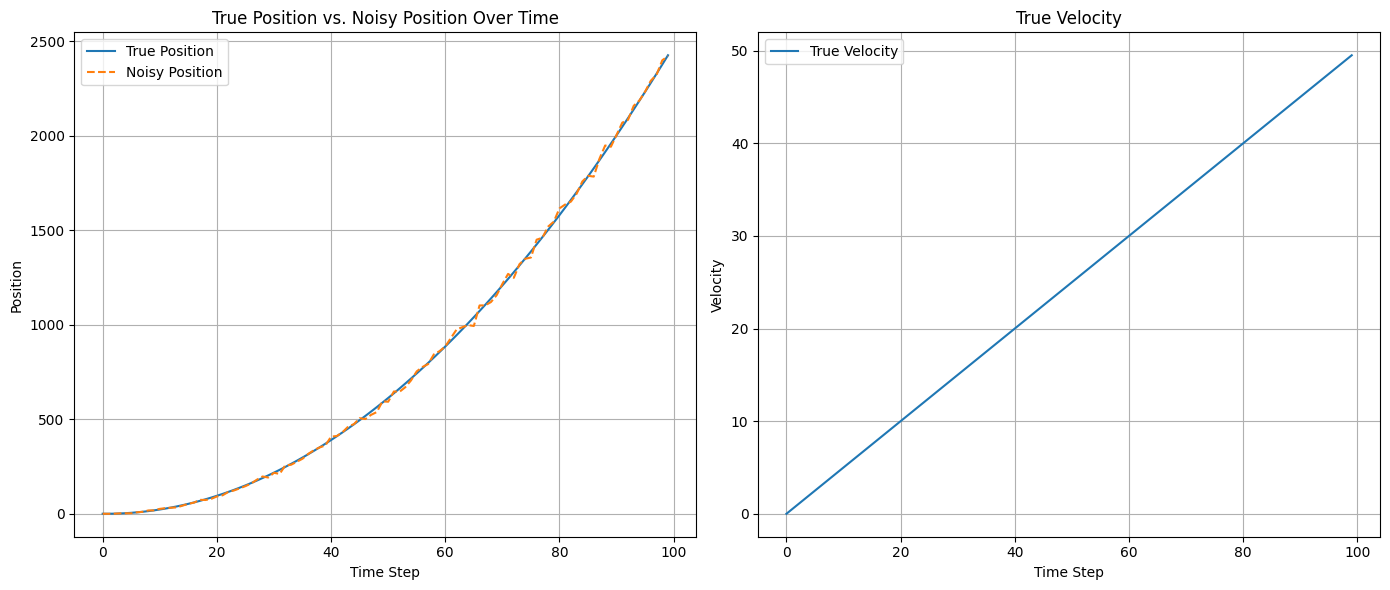

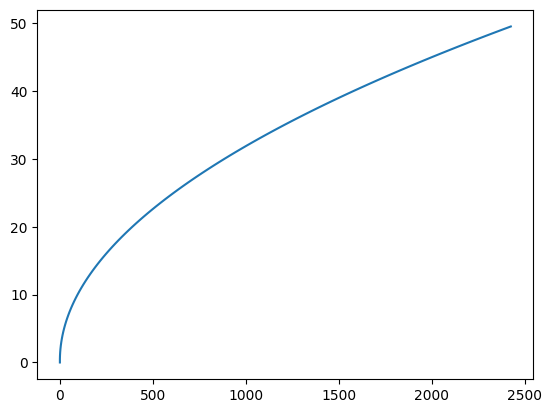

In [ ]:
# Simulate no crash, wobble, and potential, applies constant force
timesteps = 100  # number of time steps to simulate
input_force = np.ones(timesteps) * 0.5
initial_velocity = 0.0  # initial velocity of the particle
initial_position = 0.0  # initial position of the particle

# no crashing and wobble
particle = Particle(pc=0, initial_position=initial_position,
                      initial_velocity=initial_velocity, external_force=lambda y: 0, wobble=False)

# Simulate the particle's motion
positions, velocities, noisy_positions, crashes = simulate_particle(timesteps, input_force, particle)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot positions on the first subplot (ax1)
ax1.plot(positions, label='True Position')
ax1.plot(noisy_positions, label='Noisy Position', linestyle='--')
ax1.set_title('True Position vs. Noisy Position Over Time')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)

# Plot velocities on the second subplot (ax2)
ax2.plot(velocities, label='True Velocity')
# ax2.plot(noisy_velocity, label='Noisy Velocity', linestyle='--')
ax2.set_title('True Velocity')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

plt.plot(positions, velocities)


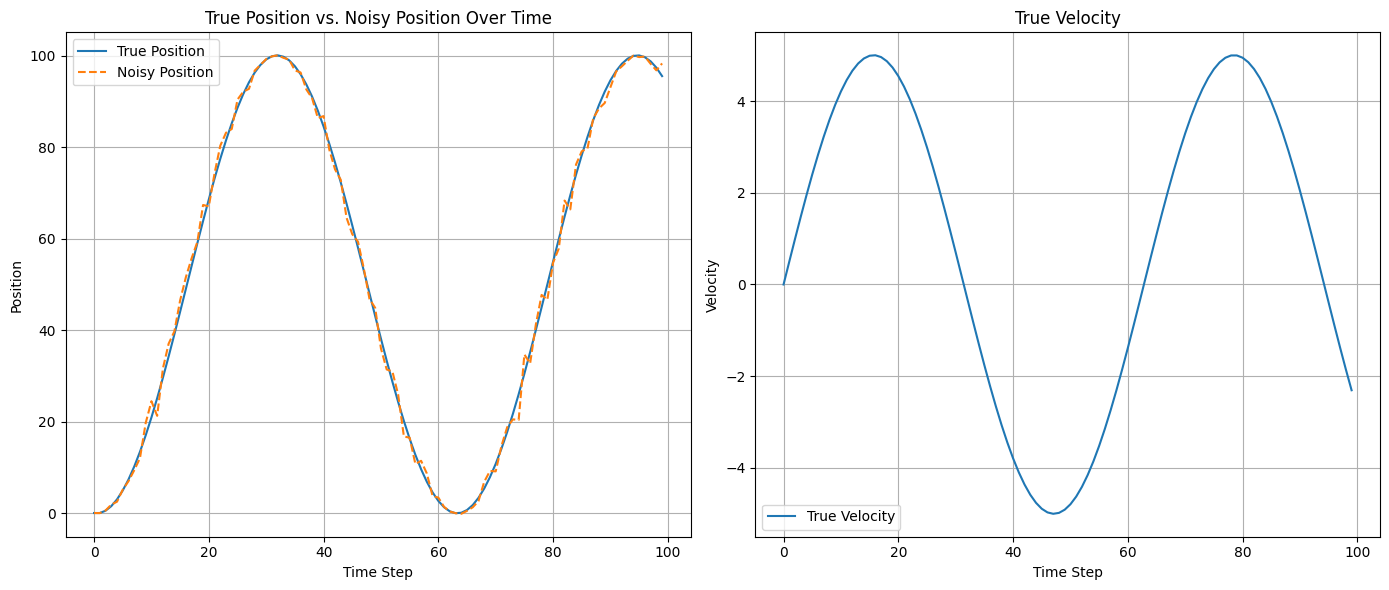

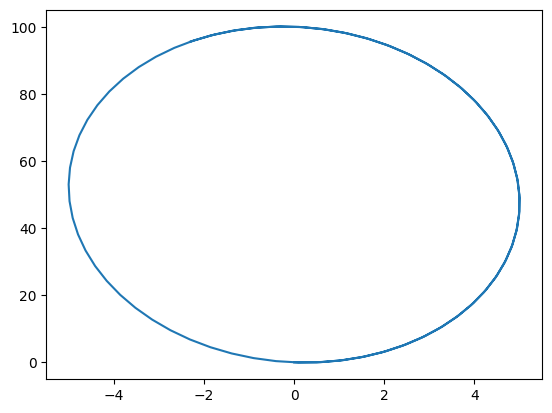

In [ ]:
# Simulate no crash, wobble, with a linear potential field and applies constant force
timesteps = 100  # number of time steps to simulate
input_force = np.ones(timesteps) * 0.5
initial_velocity = 0.0  # initial velocity of the particle
initial_position = 0.0  # initial position of the particle

# no crashing and wobble
particle = Particle(pc=0, initial_position=initial_position,
                      initial_velocity=initial_velocity, external_force=lambda position: -0.01*position, wobble=False)

# Simulate the particle's motion
positions, velocities, noisy_positions, crashes = simulate_particle(timesteps, input_force, particle)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot positions on the first subplot (ax1)
ax1.plot(positions, label='True Position')
ax1.plot(noisy_positions, label='Noisy Position', linestyle='--')
ax1.set_title('True Position vs. Noisy Position Over Time')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)

# Plot velocities on the second subplot (ax2)
ax2.plot(velocities, label='True Velocity')
# ax2.plot(noisy_velocity, label='Noisy Velocity', linestyle='--')
ax2.set_title('True Velocity')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

plt.plot(velocities, positions)

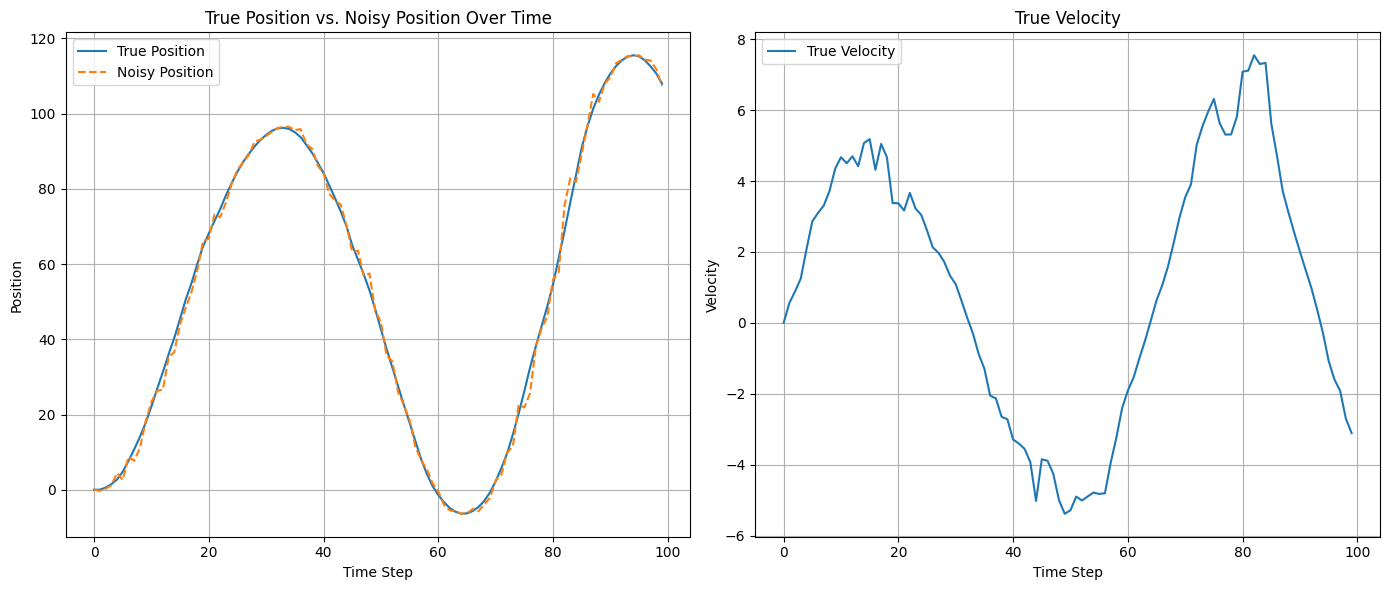

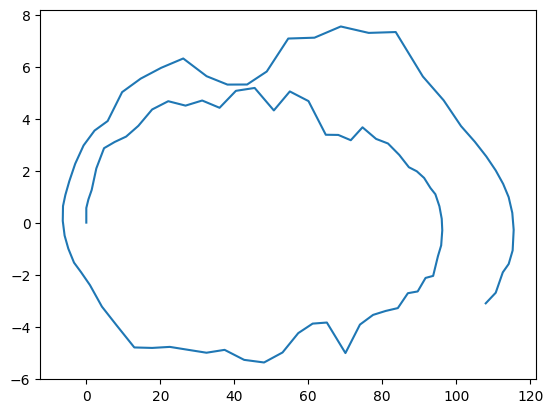

In [ ]:
# Simulate no crash, wobbles and with a linear potential field and applies constant force
timesteps = 100  # number of time steps to simulate
input_force = np.ones(timesteps) * 0.5
initial_velocity = 0.0  # initial velocity of the particle
initial_position = 0.0  # initial position of the particle

# no crashing
particle = Particle(pc=0, initial_position=initial_position,
                      initial_velocity=initial_velocity, external_force=lambda position: -0.01*position, wobble=True)

# Simulate the particle's motion
positions, velocities, noisy_positions, crashes = simulate_particle(timesteps, input_force, particle)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot positions on the first subplot (ax1)
ax1.plot(positions, label='True Position')
ax1.plot(noisy_positions, label='Noisy Position', linestyle='--')
ax1.set_title('True Position vs. Noisy Position Over Time')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)

# Plot velocities on the second subplot (ax2)
ax2.plot(velocities, label='True Velocity')
# ax2.plot(noisy_velocity, label='Noisy Velocity', linestyle='--')
ax2.set_title('True Velocity')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

plt.plot(positions, velocities)

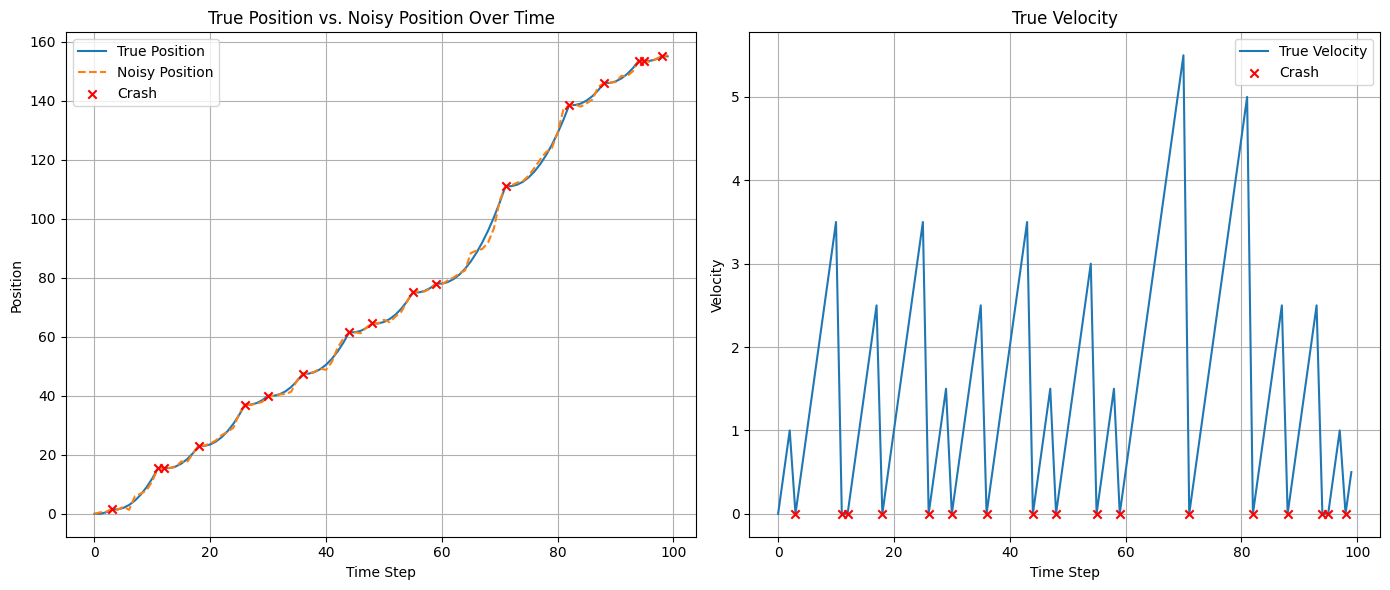

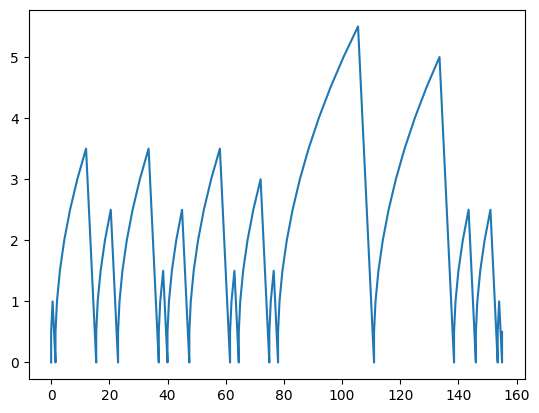

In [ ]:
# Simulate crash, no wobble and potential, applies constant force
timesteps = 100  # number of time steps to simulate
input_force = np.ones(timesteps) * 0.5
initial_velocity = 0.0  # initial velocity of the particle
initial_position = 0.0  # initial position of the particle

# no crashing and wobble
particle = Particle(pc=0.5, initial_position=initial_position,
                      initial_velocity=initial_velocity, external_force=lambda y: 0, wobble=False)

# Simulate the particle's motion
positions, velocities, noisy_positions, crashes = simulate_particle(timesteps, input_force, particle)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot positions on the first subplot (ax1)
ax1.plot(positions, label='True Position')
ax1.plot(noisy_positions, label='Noisy Position', linestyle='--')

ax1.scatter(np.where(crashes>0.1), positions[np.where(crashes>0.1)], color='red', marker='x', label='Crash', zorder=5)

ax1.set_title('True Position vs. Noisy Position Over Time')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)


# Plot velocities on the second subplot (ax2)
ax2.plot(velocities, label='True Velocity')
# ax2.plot(noisy_velocity, label='Noisy Velocity', linestyle='--')
ax2.scatter(np.where(crashes>0.1), velocities[np.where(crashes>0.1)], color='red', marker='x', label='Crash', zorder=5)

ax2.set_title('True Velocity')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

plt.plot(positions, velocities)